# 1.IPOs data

In [ ]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

# for graphs
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import requests

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
}

url = "https://stockanalysis.com/ipos/2025/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

<ipython-input-2-086f1cf7c6b6>:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  ipo_dfs = pd.read_html(response.text)


In [ ]:
ipos_2025 = ipo_dfs[0]
ipos_2025

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,"Mar 25, 2025",LGPS,LogProstyle Inc.,$5.00,$3.70,-
1,"Mar 21, 2025",BIYA,Baiya International Group Inc.,$4.00,$4.15,3.75%
2,"Mar 21, 2025",GSHR,Gesher Acquisition Corp. II,$10.00,$0.33,-96.70%
3,"Mar 21, 2025",RCT,RedCloud Holdings plc,$4.50,$4.78,6.22%
4,"Mar 18, 2025",QSEA,Quartzsea Acquisition Corporation,$10.00,$10.06,0.60%
...,...,...,...,...,...,...
64,"Jan 10, 2025",MIMI,Mint Incorporation Limited,$4.00,$6.00,50.00%
65,"Jan 8, 2025",MASK,3 E Network Technology Group Limited,$4.00,$3.56,-11.13%
66,"Jan 7, 2025",CEPO,"Cantor Equity Partners I, Inc.",$10.00,$10.20,2.00%
67,"Jan 7, 2025",ZYBT,Zhengye Biotechnology Holding Limited,$4.00,$8.07,101.75%


In [ ]:
ipos_2025.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      69 non-null     object
 1   Symbol        69 non-null     object
 2   Company Name  69 non-null     object
 3   IPO Price     69 non-null     object
 4   Current       69 non-null     object
 5   Return        69 non-null     object
dtypes: object(6)
memory usage: 3.4+ KB


In [ ]:
url = "https://stockanalysis.com/ipos/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

<ipython-input-5-61ec5b467773>:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  ipo_dfs = pd.read_html(response.text)


In [ ]:
ipo_latest = ipo_dfs[0]
ipo_latest.head()

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,"Mar 18, 2025",QSEA,Quartzsea Acquisition Corporation,$10.00,$10.06,0.60%
1,"Mar 13, 2025",MWYN,"Marwynn Holdings, Inc.",$4.00,$4.33,8.25%
2,"Mar 7, 2025",MCRP,Micropolis Holding Company,$4.00,$3.24,-19.10%
3,"Mar 7, 2025",SAGT,Sagtec Global Limited,$4.00,$3.35,-16.25%
4,"Mar 6, 2025",ADVB,Advanced Biomed Inc.,$4.00,$3.90,-2.50%


In [ ]:
stacked_ipos = pd.concat([ipos_2025, ipo_latest],ignore_index=True)
stacked_ipos.head()

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,"Mar 25, 2025",LGPS,LogProstyle Inc.,$5.00,$3.70,-
1,"Mar 21, 2025",BIYA,Baiya International Group Inc.,$4.00,$4.15,3.75%
2,"Mar 21, 2025",GSHR,Gesher Acquisition Corp. II,$10.00,$0.33,-96.70%
3,"Mar 21, 2025",RCT,RedCloud Holdings plc,$4.50,$4.78,6.22%
4,"Mar 18, 2025",QSEA,Quartzsea Acquisition Corporation,$10.00,$10.06,0.60%


In [ ]:
stacked_ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      269 non-null    object
 1   Symbol        269 non-null    object
 2   Company Name  269 non-null    object
 3   IPO Price     269 non-null    object
 4   Current       269 non-null    object
 5   Return        269 non-null    object
dtypes: object(6)
memory usage: 12.7+ KB


In [ ]:
stacked_ipos['IPO Date'] = pd.to_datetime(stacked_ipos['IPO Date'])

In [ ]:
# Problem --> not always the columns are filled
missing_prices_df = stacked_ipos[stacked_ipos['IPO Price'].astype(str).str.find('-') >= 0]
missing_prices_df

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
191,2024-10-11,STFS,Star Fashion Culture Holdings Limited,-,$1.20,-


In [ ]:
stacked_ipos.isnull().sum()

,0
IPO Date,0
Symbol,0
Company Name,0
IPO Price,0
Current,0
Return,0


In [ ]:
stacked_ipos['IPO Price'] = pd.to_numeric(stacked_ipos['IPO Price'].str.replace('$',''),errors='coerce')
stacked_ipos['IPO Price'] = pd.to_numeric(stacked_ipos['IPO Price'])


In [ ]:
# convert column
stacked_ipos['Current'] = pd.to_numeric(stacked_ipos['Current'].str.replace('$',''),errors='coerce')

stacked_ipos['Return'] = pd.to_numeric(stacked_ipos['Return'].str.replace('%',''),errors='coerce')/100

In [ ]:
stacked_ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   IPO Date      269 non-null    datetime64[ns]
 1   Symbol        269 non-null    object        
 2   Company Name  269 non-null    object        
 3   IPO Price     268 non-null    float64       
 4   Current       269 non-null    float64       
 5   Return        262 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 12.7+ KB


In [ ]:
stacked_ipos.isnull().sum()

,0
IPO Date,0
Symbol,0
Company Name,0
IPO Price,1
Current,0
Return,7


In [ ]:
stacked_ipos[stacked_ipos.Return.isnull()]

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,2025-03-25,LGPS,LogProstyle Inc.,5.0,3.70,NaN
19,2025-02-27,WETO,Webus International Limited,4.0,4.00,NaN
53,2025-01-22,DGNX,Diginex Limited,4.1,96.86,NaN
84,2025-02-27,WETO,Webus International Limited,4.0,4.00,NaN
118,2025-01-22,DGNX,Diginex Limited,4.1,96.86,NaN
144,2024-12-13,DRDB,Roman DBDR Acquisition Corp. II,10.0,10.00,NaN
191,2024-10-11,STFS,Star Fashion Culture Holdings Limited,NaN,1.20,NaN


In [ ]:
stacked_ipos['IPO Price'].mean()

np.float64(9.738955223880597)

In [ ]:
stacked_ipos.describe().T

,count,mean,min,25%,50%,75%,max,std
IPO Date,269,2024-12-02 09:16:43.717472,2024-06-14 00:00:00,2024-10-02 00:00:00,2024-12-31 00:00:00,2025-02-06 00:00:00,2025-03-25 00:00:00,NaN
IPO Price,268.0,9.738955,3.0,4.0,10.0,10.0,78.0,8.209546
Current,269.0,9.897695,0.1,3.35,9.15,10.2,96.86,12.932443
Return,262.0,-0.098374,-0.9757,-0.460125,-0.003,0.023125,3.6424,0.531628


In [ ]:
stacked_ipos['Price Increase'] = stacked_ipos['Current'] - stacked_ipos['IPO Price']
stacked_ipos.head()

,IPO Date,Symbol,Company Name,IPO Price,Current,Return,Price Increase
0,2025-03-25,LGPS,LogProstyle Inc.,5.0,3.70,NaN,-1.30
1,2025-03-21,BIYA,Baiya International Group Inc.,4.0,4.15,0.0375,0.15
2,2025-03-21,GSHR,Gesher Acquisition Corp. II,10.0,0.33,-0.9670,-9.67
3,2025-03-21,RCT,RedCloud Holdings plc,4.5,4.78,0.0622,0.28
4,2025-03-18,QSEA,Quartzsea Acquisition Corporation,10.0,10.06,0.0060,0.06


In [ ]:
# visualise
import plotly.express as px

# Truncate to the first day in the month - for Bar names
stacked_ipos['Date_monthly'] = stacked_ipos['IPO Date'].dt.to_period('M').dt.to_timestamp()

# Count the number of deals for each month and year
monthly_deals = stacked_ipos['Date_monthly'].value_counts().reset_index().sort_values(by='Date_monthly')
monthly_deals.columns = ['Date_monthly','Number of Deals']

fig = px.bar(monthly_deals,
             x = 'Date_monthly',
             y = 'Number of Deals',
             labels={'Month_Year': 'Month and Year', 'Number of Deals': 'Number of Deals'},
             title='Number of IPO Deals per Month and Year',
             text='Number of Deals'
             )
fig.update_traces(textposition='outside', # Position the text outside the bars
                  textfont=dict(color='black',size=14), # Adjust the font size of the text
                  )
fig.update_layout(title_x=0.5) # Center the title

fig.show()

In [ ]:
reddit = yf.download(tickers = "RDDT",
                     period = "max",
                     interval = "1d")

reddit.tail()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RDDT,RDDT,RDDT,RDDT,RDDT
Date,,,,,
2025-03-19,109.910004,113.480003,105.500000,110.099998,9529600
2025-03-20,108.750000,112.989998,107.040001,109.180000,7803400
2025-03-21,115.699997,116.290001,106.000000,107.800003,7987100
2025-03-24,124.940002,126.500000,119.760002,119.809998,9012100
2025-03-25,125.430000,127.269997,120.019997,124.000000,5803600


<Axes: title={'center': "Reddit's (RDDT) price after the IPO"}, xlabel='Date'>

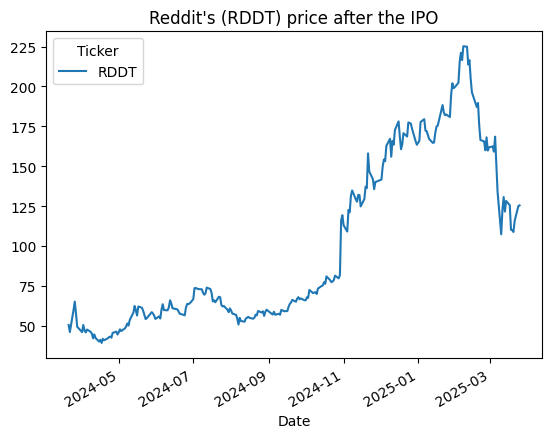

In [ ]:
reddit['Close'].plot.line(title='Reddit\'s (RDDT) price after the IPO')


# 2.OHLCV Data Transformations
### 2.1 Time Series for OHLCV

In [ ]:
reliance_df = yf.download(tickers="RELIANCE.NS",
                          period="max",
                          interval="1d")
reliance_df.tail()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-03-20,1269.150024,1273.000000,1250.050049,1251.849976,15971477
2025-03-21,1276.349976,1281.000000,1270.099976,1275.000000,21780769
2025-03-24,1302.099976,1306.000000,1284.250000,1291.000000,20299319
2025-03-25,1285.449951,1307.699951,1282.599976,1307.699951,13713899
2025-03-26,1273.050049,1293.800049,1268.750000,1291.000000,12071552


In [ ]:
reliance_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7341 entries, 1996-01-01 to 2025-03-26
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Close, RELIANCE.NS)   7341 non-null   float64
 1   (High, RELIANCE.NS)    7341 non-null   float64
 2   (Low, RELIANCE.NS)     7341 non-null   float64
 3   (Open, RELIANCE.NS)    7341 non-null   float64
 4   (Volume, RELIANCE.NS)  7341 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 344.1 KB


In [ ]:
reliance_df_filtered_2020 = reliance_df[reliance_df.index >= '2020-01-01']
reliance_df_filtered_2024_25 = reliance_df[reliance_df.index >= '2024-01-01']

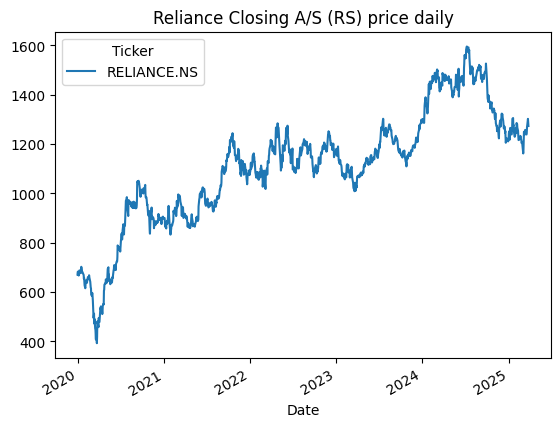

In [ ]:
reliance_df_filtered_2020['Close'].plot.line(title='Reliance Closing A/S (RS) price daily')
plt.show()


In [ ]:
# generating new fields (using DateTime features):
reliance_df['Ticker'] = 'Reliance'
reliance_df['Year']= reliance_df.index.year
reliance_df['Month'] = reliance_df.index.month
reliance_df['Weekday'] = reliance_df.index.weekday
reliance_df['Date'] = reliance_df.index.date

In [ ]:
reliance_df.head()

Price,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,Date
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,,,,
Date,,,,,,,,,,
1996-01-01,3.664544,3.670778,3.627142,3.651187,104121369,Reliance,1996,1,0,1996-01-01
1996-01-02,3.636047,3.673450,3.609331,3.655639,168743308,Reliance,1996,1,1,1996-01-02
1996-01-03,3.663654,3.864023,3.655639,3.695712,209323879,Reliance,1996,1,2,1996-01-03
1996-01-04,3.629814,3.640500,3.580835,3.628924,216900264,Reliance,1996,1,3,1996-01-04
1996-01-05,3.604878,3.615565,3.573710,3.615565,166708467,Reliance,1996,1,4,1996-01-05


In [ ]:
# shift ALL values (on x periods forward (+1) and backward (-1))
# equivalent of joining with a dataframe of the same vector, but with shifted date index
reliance_df['close_minus_1'] = reliance_df['Close'].shift(-1)
reliance_df['close_plus_1'] = reliance_df['Close'].shift(1)

In [ ]:
reliance_df.head()

Price,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,Date,close_minus_1,close_plus_1
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,,,,,,
Date,,,,,,,,,,,,
1996-01-01,3.664544,3.670778,3.627142,3.651187,104121369,Reliance,1996,1,0,1996-01-01,3.636047,NaN
1996-01-02,3.636047,3.673450,3.609331,3.655639,168743308,Reliance,1996,1,1,1996-01-02,3.663654,3.664544
1996-01-03,3.663654,3.864023,3.655639,3.695712,209323879,Reliance,1996,1,2,1996-01-03,3.629814,3.636047
1996-01-04,3.629814,3.640500,3.580835,3.628924,216900264,Reliance,1996,1,3,1996-01-04,3.604878,3.663654
1996-01-05,3.604878,3.615565,3.573710,3.615565,166708467,Reliance,1996,1,4,1996-01-05,3.460612,3.629814


In [ ]:
# historical growth
reliance_df['growth_1d'] = reliance_df['Close'].pct_change() * 100
reliance_df['growth_30d'] = ((reliance_df['Close'] - reliance_df['Close'].shift(30)) / reliance_df['Close'].shift(30)) * 100

In [ ]:
reliance_df.tail()

Price,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,Date,close_minus_1,close_plus_1,growth_1d,growth_30d
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,,,,,,,,
Date,,,,,,,,,,,,,,
2025-03-20,1269.150024,1273.000000,1250.050049,1251.849976,15971477,Reliance,2025,3,3,2025-03-20,1276.349976,1247.150024,1.764022,-1.248827
2025-03-21,1276.349976,1281.000000,1270.099976,1275.000000,21780769,Reliance,2025,3,4,2025-03-21,1302.099976,1269.150024,0.567305,-0.144733
2025-03-24,1302.099976,1306.000000,1284.250000,1291.000000,20299319,Reliance,2025,3,0,2025-03-24,1285.449951,1276.349976,2.017472,1.603521
2025-03-25,1285.449951,1307.699951,1282.599976,1307.699951,13713899,Reliance,2025,3,1,2025-03-25,1273.050049,1302.099976,-1.278706,1.480224
2025-03-26,1273.050049,1293.800049,1268.750000,1291.000000,12071552,Reliance,2025,3,2,2025-03-26,NaN,1285.449951,-0.964635,1.547483


In [ ]:
# future growth for regression models
reliance_df['growth_future_1d'] = reliance_df['Close'].shift(-1) / reliance_df['Close']

In [ ]:
# FUTURE Growth: for binary models
reliance_df['is_positive_growth_1d_future'] = np.where(reliance_df['growth_future_1d'] > 1, 1, 0)


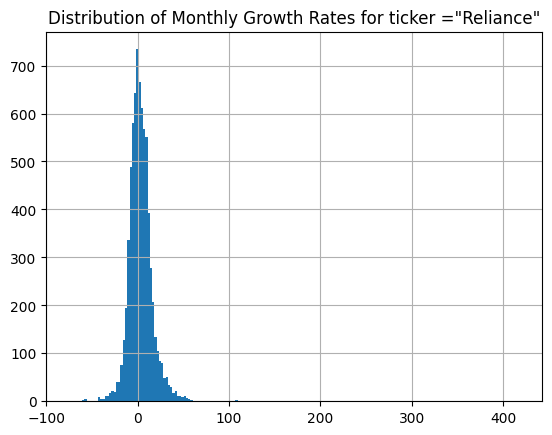

In [ ]:
# normally the growth in 1 day is +-10%, while a lot of it is around 0% (around 1.)
plt.title('Distribution of Monthly Growth Rates for ticker ="Reliance"')
reliance_df.growth_30d.hist(bins=200)
plt.show()

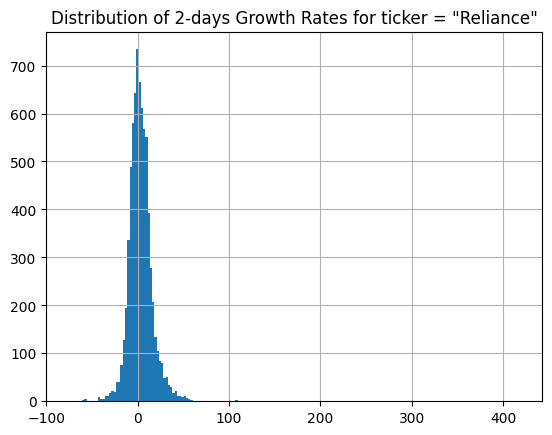

In [ ]:
# you can see that the growth is can be much wider in 30 days (+- 30%)
plt.title('Distribution of 2-days Growth Rates for ticker = "Reliance"')

reliance_df.growth_30d.hist(bins=200)
plt.show()

In [ ]:
# for modeling: we use growth_1d, growth_2d as feature
COLUMNS = [k for k in reliance_df.columns if 'growth' in str(k) or k=='Close']
reliance_df[COLUMNS].tail()

Price,growth_1d,growth_30d,growth_future_1d,is_positive_growth_1d_future
Ticker,,,,
Date,,,,
2025-03-20,1.764022,-1.248827,1.005673,1
2025-03-21,0.567305,-0.144733,1.020175,1
2025-03-24,2.017472,1.603521,0.987213,0
2025-03-25,-1.278706,1.480224,0.990354,0
2025-03-26,-0.964635,1.547483,NaN,0


In [ ]:
# calculate distribution
reliance_df.is_positive_growth_1d_future.value_counts()/len(reliance_df)

,count
is_positive_growth_1d_future,
1,0.505108
0,0.494892


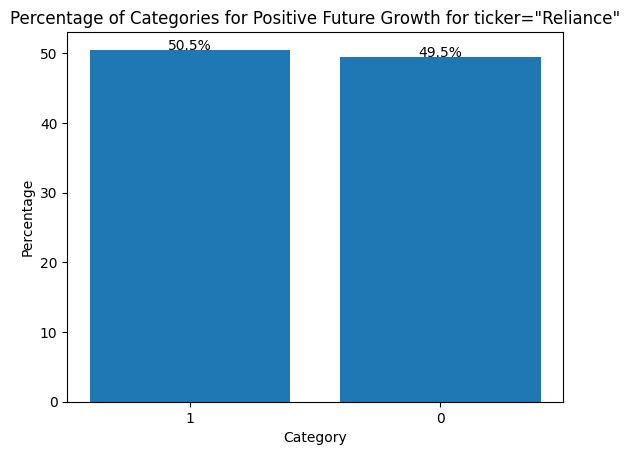

In [ ]:
# calculate value_counts

value_counts = reliance_df.is_positive_growth_1d_future.value_counts()

# percent
percentage = value_counts / len(reliance_df) * 100

plt.bar(percentage.index.astype(str),percentage)
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of Categories for Positive Future Growth for ticker="Reliance"')

# Add percentage values on top of each bar
for i, value in enumerate(percentage):
    plt.text(i, value + 0, f'{value:.1f}%', ha='center')

plt.show()


### 2.2 Candlestick chart for OHLCV

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=reliance_df_filtered_2020.index,
                open=reliance_df_filtered_2020.Open,
                high=reliance_df_filtered_2020.High,
                low=reliance_df_filtered_2020.Low,
                close=reliance_df_filtered_2020.Close)
               ])

fig.update_layout(
    title="Reliance's daily candlestick chart from 2020",
    title_x=0.5,
    xaxis_rangeslider_visible=True
    )

fig.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=reliance_df.index,
                open=reliance_df.Open,
                high=reliance_df.High,
                low=reliance_df.Low,
                close=reliance_df.Close)
               ])

fig.update_layout(
    title="Reliance's daily candlestick chart",
    title_x=0.5,
    xaxis_rangeslider_visible=True
    )

fig.show()

## 3 Macro Indicators

In [ ]:
end = date.today()
start = date(end.year - 75, end.month, end.day)
nifty = yf.download('^NSEI', start=start, end=end)
nifty.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0
2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0
2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0
2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0
2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0


In [ ]:

def get_growth_df(df: pd.DataFrame, prefix: str) -> pd.DataFrame:
    # Initialize an empty list to store the growth column names
    GROWTH_KEYS = []

    # Calculate growth for multiple periods: 1, 3, 7, 30, 90, and 365 days
    for i in [1, 3, 7, 30, 90, 365]:
        # Calculate growth as the percentage change from the 'Close' price
        df[f'growth_{prefix}_{i}d'] = ((df['Close'] / df['Close'].shift(i)) - 1) * 100

        # Append the new column names to the GROWTH_KEYS list
        GROWTH_KEYS.append(f'growth_{prefix}_{i}d')

    # Return only the columns related to growth
    return df[GROWTH_KEYS]


In [ ]:
nifty50_to_merge = get_growth_df(nifty,'Nifty50')
nifty50_to_merge.sample(5)

Price,growth_Nifty50_1d,growth_Nifty50_3d,growth_Nifty50_7d,growth_Nifty50_30d,growth_Nifty50_90d,growth_Nifty50_365d
Ticker,,,,,,
Date,,,,,,
2022-01-19,-0.964224,-1.738354,-0.360492,2.682639,3.276770,64.699411
2018-02-22,-0.141862,0.041430,-1.490071,-2.390710,2.835662,18.170540
2024-06-07,2.053993,6.423041,2.578546,3.962745,9.658500,25.912099
2011-10-12,2.513892,4.323812,3.158851,7.405538,-8.809015,-2.225125
2012-09-20,-0.817846,-0.419530,3.557408,6.490975,11.852302,3.532317


In [ ]:
bse100_daily = yf.download(tickers="^BSESN",
                           period="max",
                           interval="1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
bse100_daily_to_merge = get_growth_df(bse100_daily,'dji')
bse100_daily_to_merge.tail(2)

Price,growth_dji_1d,growth_dji_3d,growth_dji_7d,growth_dji_30d,growth_dji_90d,growth_dji_365d
Ticker,,,,,,
Date,,,,,,
2025-03-25,0.042066,2.186205,5.672956,0.201643,-0.836340,17.995669
2025-03-26,-0.934009,0.498004,4.204596,-0.030134,-0.518018,17.982723


In [ ]:
# WisdomTree India Earnings Fund (EPI)
epi_etf_daily = yf.download(tickers = "EPI",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:

epi_etf_daily_to_merge = get_growth_df(epi_etf_daily,'epi')
epi_etf_daily_to_merge.tail(2)


Price,growth_epi_1d,growth_epi_3d,growth_epi_7d,growth_epi_30d,growth_epi_90d,growth_epi_365d
Ticker,,,,,,
Date,,,,,,
2025-03-24,1.444957,3.220539,7.667959,2.669447,-5.565163,19.790920
2025-03-25,-0.045219,2.981595,6.710110,2.504053,-5.627966,21.442597


In [ ]:
import pandas_datareader.wb as wb
india_gdp = wb.download(indicator="NY.GDP.MKTP.CD", country="IN", start=start,end=end)


<ipython-input-52-3920dd5ce7f0>:2: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



In [ ]:
india_gdp['india_gdp_yoy'] = india_gdp['NY.GDP.MKTP.CD'] / india_gdp['NY.GDP.MKTP.CD'].shift(4) - 1

# Calculate Quarter-over-Quarter (QoQ) Growth
india_gdp['india_gdp_qoq'] = india_gdp['NY.GDP.MKTP.CD'] / india_gdp['NY.GDP.MKTP.CD'].shift(1) - 1

india_gdp.tail()

NY.GDP.MKTP.CD  india_gdp_yoy  india_gdp_qoq
country year                                              
India   1964    5.648029e+10       0.063950      -0.051646
        1963    4.842192e+10      -0.034168      -0.142676
        1962    4.216148e+10      -0.075025      -0.129289
        1961    3.923244e+10      -0.341252      -0.069472
        1960    3.702988e+10      -0.344375      -0.056141

In [ ]:
india_gdp_to_merge = india_gdp[['india_gdp_yoy','india_gdp_qoq']]
india_gdp_to_merge.tail(1)

,,india_gdp_yoy,india_gdp_qoq
country,year,,
India,1960,-0.344375,-0.056141


In [ ]:
# cPI index
india_cpi = wb.download(indicator="FP.CPI.TOTL.ZG", country="IN", start=start, end=end)
india_cpi.head()

<ipython-input-55-5f338b3c129a>:2: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



FP.CPI.TOTL.ZG
country year                
India   2023        5.649143
        2022        6.699034
        2021        5.131407
        2020        6.623437
        2019        3.729506

In [ ]:
india_cpi['cpi_core_yoy'] = india_cpi['FP.CPI.TOTL.ZG']/india_cpi['FP.CPI.TOTL.ZG'].shift(12)-1
india_cpi['cpi_core_mom'] = india_cpi['FP.CPI.TOTL.ZG']/india_cpi['FP.CPI.TOTL.ZG'].shift(1)-1

india_cpi.tail()

FP.CPI.TOTL.ZG  cpi_core_yoy  cpi_core_mom
country year                                            
India   1964       13.355261     -2.749457      0.409562
        1963        2.946161     -0.487484     -0.779401
        1962        3.632215     -0.872994      0.232864
        1961        1.695213     -0.899933     -0.533284
        1960        1.779878     -0.723711      0.049944

In [ ]:
india_cpi_to_merge = india_cpi[['cpi_core_yoy','cpi_core_mom']]
india_cpi_to_merge.tail(2)

cpi_core_yoy  cpi_core_mom
country year                            
India   1961     -0.899933     -0.533284
        1960     -0.723711      0.049944

### 3.2 Volatility Index

In [ ]:
vix = yf.download(tickers = "^VIX",
                     period = "max",
                     interval = "1d")
vix.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^VIX,^VIX,^VIX,^VIX,^VIX
Date,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,0
1990-01-03,18.190001,18.190001,18.190001,18.190001,0
1990-01-04,19.219999,19.219999,19.219999,19.219999,0
1990-01-05,20.110001,20.110001,20.110001,20.110001,0
1990-01-08,20.260000,20.260000,20.260000,20.260000,0


In [ ]:
vix_to_merge = vix['Close']
vix_to_merge.tail()

Ticker,^VIX
Date,
2025-03-20,19.799999
2025-03-21,19.280001
2025-03-24,17.480000
2025-03-25,17.150000
2025-03-26,17.299999


<Axes: title={'center': 'VIX value over time'}, xlabel='Date'>

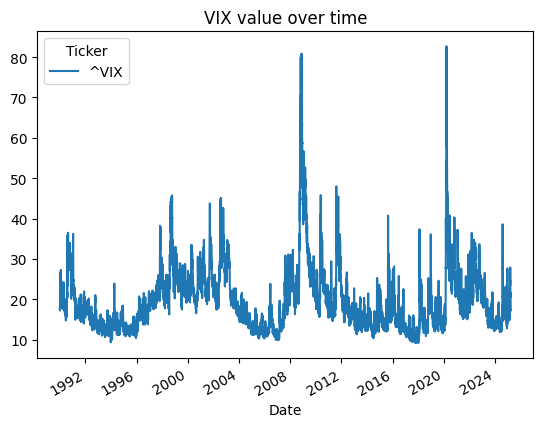

In [ ]:
vix['Close'].plot.line(title = "VIX value over time")


In [ ]:
vix['Close'].values.flatten().shape

(8874,)

In [ ]:
fig = px.line(vix,
              x=vix.index,
              y=vix['Close'].values.flatten(),
              title='VIX over time')
fig.update_layout(title_x=0.5)

fig.show()

### 3.2 Gold / Assets

In [ ]:
gold = yf.download(tickers="GOLDBEES.NS",
                            period="max",  # Max period to get the longest available data
                            interval="1d")

gold.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOLDBEES.NS,GOLDBEES.NS,GOLDBEES.NS,GOLDBEES.NS,GOLDBEES.NS
Date,,,,,
2009-01-02,13.3700,13.43,13.3000,0.0,1043400
2009-01-05,13.1555,13.32,13.1500,0.0,1294700
2009-01-06,13.0400,13.20,13.0201,0.0,1236000
2009-01-07,13.2150,13.25,13.0600,0.0,1109000
2009-01-09,13.1689,13.20,13.0600,0.0,723900


In [ ]:
gold_to_merge = get_growth_df(gold,'gold')
gold_to_merge.tail(2)

Price,growth_gold_1d,growth_gold_3d,growth_gold_7d,growth_gold_30d,growth_gold_90d,growth_gold_365d
Ticker,,,,,,
Date,,,,,,
2025-03-25,0.315073,-1.691495,0.563037,2.362318,15.778661,48.569694
2025-03-26,0.027307,-0.946581,-0.380795,1.006624,18.546689,50.010234


In [ ]:
gold.index.shape

(4000,)

In [ ]:
# Dynamic visualisation of GOLD prices
fig = px.line(gold,
              x=gold.index,
              y=gold['Close'].values.flatten(),
              title='GOLD over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

### 3.3 Crude and Brent Oil

In [ ]:
brent_crude = yf.download("BZ=F",  # Ticker for Brent Crude Oil on Yahoo Finance
                          start="2000-01-01",  # Start date for historical data
                          end="2025-01-01",    # End date for historical data
                          interval="1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
brent_crude.head()

Price,Close,High,Low,Open,Volume
Ticker,BZ=F,BZ=F,BZ=F,BZ=F,BZ=F
Date,,,,,
2007-07-30,75.739998,76.529999,75.440002,75.849998,2575
2007-07-31,77.050003,77.169998,75.669998,75.699997,3513
2007-08-01,75.349998,77.059998,74.860001,77.000000,3930
2007-08-02,75.760002,76.209999,74.269997,75.220001,6180
2007-08-03,74.750000,76.000000,74.529999,75.389999,4387


In [ ]:
crude_oil_to_merge = get_growth_df(brent_crude,'wti_oil')
crude_oil_to_merge.tail(2)

Price,growth_wti_oil_1d,growth_wti_oil_3d,growth_wti_oil_7d,growth_wti_oil_30d,growth_wti_oil_90d,growth_wti_oil_365d
Ticker,,,,,,
Date,,,,,,
2024-12-30,0.296618,1.100839,1.362583,2.522053,-2.182779,-6.592165
2024-12-31,0.336067,1.883698,2.414932,5.067565,-3.341106,-7.931418


In [ ]:
brent_crude.index.shape

(4333,)

In [ ]:
# Dynamic visualisation
fig = px.line(brent_crude,
              x=brent_crude.index,
              y=brent_crude["Close"].values.flatten(),
              title='WTI Crude Oil over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

### 3.4 Bitcoin Prices

In [ ]:
btc_usd =  yf.download(tickers = "BTC-USD",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
btc_usd.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [ ]:
btc_usd_to_merge = get_growth_df(btc_usd,'btc_usd')
btc_usd_to_merge.tail()

Price,growth_btc_usd_1d,growth_btc_usd_3d,growth_btc_usd_7d,growth_btc_usd_30d,growth_btc_usd_90d,growth_btc_usd_365d
Ticker,,,,,,
Date,,,,,,
2025-03-22,-0.250773,-3.479096,-0.605414,-14.747150,-11.852648,31.442634
2025-03-23,2.650393,2.242180,4.207678,-10.477102,-9.116284,34.329403
2025-03-24,1.678635,4.111778,4.071601,-9.400553,-11.327140,30.140540
2025-03-25,-0.031099,4.341060,5.746240,-9.142890,-11.910965,25.033145
2025-03-26,0.226582,1.877329,0.939127,-4.100140,-8.482252,25.264480


In [ ]:
# Dynamic visualisation
fig = px.line(btc_usd,
              x=btc_usd.index,
              y=btc_usd["Close"].values.flatten(),
              title='Bitcoin price daily')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

# 4. Fundamenta Indicaators

In [ ]:
IN_TOP_EMPLOYEES_STOCKS = [
    'TCS.NS',
    'INFY.NS',
    'RELIANCE.NS',
    'HDFCBANK.NS',
    'BAJFINANCE.NS',
    'ICICIBANK.NS',
    'HINDUNILVR.NS',
    'KOTAKBANK.NS',
    'LT.NS',
    'SBI.NS'
]

In [ ]:
ticker = IN_TOP_EMPLOYEES_STOCKS[0]

In [ ]:
tcs_company = yf.Ticker(ticker)

In [ ]:
# Fundamental info appears close earning dates, you need to download it and use quickly (before/after trading day),
#  unless you're a fundamental long-term investor looking for a several months-quarters-years strategy (period between buy and sell)
# This dfthis is the easiest thing to join with the main dataset and get "some" technical indicators present
eps_earnings = tcs_company.earnings_dates
eps_earnings['Ticker'] = ticker
eps_earnings


,EPS Estimate,Reported EPS,Surprise(%),Ticker
Earnings Date,,,,
2026-01-07 16:00:00+05:30,NaN,NaN,NaN,TCS.NS
2025-10-08 16:00:00+05:30,NaN,NaN,NaN,TCS.NS
2025-07-09 16:00:00+05:30,NaN,NaN,NaN,TCS.NS
2025-04-10 16:00:00+05:30,NaN,NaN,NaN,TCS.NS
2025-01-09 16:16:00+05:30,33.77,34.21,1.31,TCS.NS
2024-10-10 16:08:00+05:30,34.64,32.92,-4.97,TCS.NS
2024-07-11 15:57:00+05:30,33.04,33.28,0.71,TCS.NS
2024-04-12 15:43:00+05:30,33.44,34.37,2.77,TCS.NS
2024-01-11 15:56:00+05:30,31.67,30.29,-4.37,TCS.NS


In [ ]:
tcs_company.calendar

{'Ex-Dividend Date': datetime.date(2025, 1, 17),
 'Earnings Date': [datetime.date(2025, 4, 10), datetime.date(2025, 4, 14)],
 'Earnings High': 38.5,
 'Earnings Low': 34.4,
 'Earnings Average': 35.88746,
 'Revenue High': 658298000000,
 'Revenue Low': 612370000000,
 'Revenue Average': 645468399680}

In [ ]:
tcs_company.financials

,2024-03-31,2023-03-31,2022-03-31,2021-03-31
Tax Effect Of Unusual Items,-1924680000.0,277560000.0,238080000.0,-2821120000.0
Tax Rate For Calcs,0.258,0.257,0.256,0.256
Normalized EBITDA,685060000000.0,626000000000.0,569820000000.0,495640000000.0
Total Unusual Items,-7460000000.0,1080000000.0,930000000.0,-11020000000.0
Total Unusual Items Excluding Goodwill,-7460000000.0,1080000000.0,930000000.0,-11020000000.0
Net Income From Continuing Operation Net Minority Interest,459080000000.0,421470000000.0,383270000000.0,324300000000.0
Reconciled Depreciation,49850000000.0,50220000000.0,46040000000.0,40650000000.0
Reconciled Cost Of Revenue,1328710000000.0,1197590000000.0,1002670000000.0,868750000000.0
EBITDA,677600000000.0,627080000000.0,570750000000.0,484620000000.0
EBIT,627750000000.0,576860000000.0,524710000000.0,443970000000.0


In [ ]:
EPS = tcs_company.financials.loc['Basic EPS']
EPS

,Basic EPS
2024-03-31,125.88
2023-03-31,115.19
2022-03-31,103.62
2021-03-31,86.71


In [ ]:
# or should we use NORMALIZED_EBITDA?
EBITDA = tcs_company.financials.loc['EBITDA']
EBITDA_margin = tcs_company.financials.loc['EBITDA'] /  tcs_company.financials.loc['Total Revenue']


In [ ]:
EBITDA_margin

,0
2024-03-31,0.281287
2023-03-31,0.278136
2022-03-31,0.297647
2021-03-31,0.295181


In [ ]:
NET_INCOME = tcs_company.financials.loc['Net Income']
NET_INCOME_margin = tcs_company.financials.loc['Net Income'] /  tcs_company.financials.loc['Total Revenue']
NET_INCOME

,Net Income
2024-03-31,459080000000.0
2023-03-31,421470000000.0
2022-03-31,383270000000.0
2021-03-31,324300000000.0


In [ ]:
NET_INCOME_margin

,0
2024-03-31,0.190574
2023-03-31,0.186939
2022-03-31,0.199876
2021-03-31,0.197531


In [ ]:
# Combine the series into a DataFrame
df_fin_ratios = pd.DataFrame({
    'NET_INCOME_margin': 100.0 * NET_INCOME_margin, #for visualisation -- Margin in %
    'EBITDA_margin': 100.0 *EBITDA_margin, #for visualisation -- Margin in %
    'EPS': EPS
})

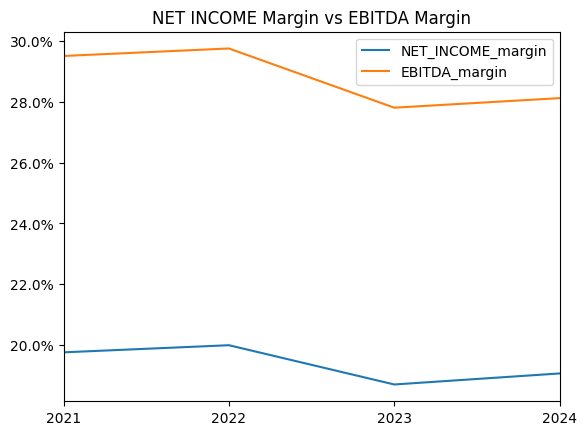

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

ax = df_fin_ratios[['NET_INCOME_margin','EBITDA_margin']].plot.line()

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('NET INCOME Margin vs EBITDA Margin')
plt.show()

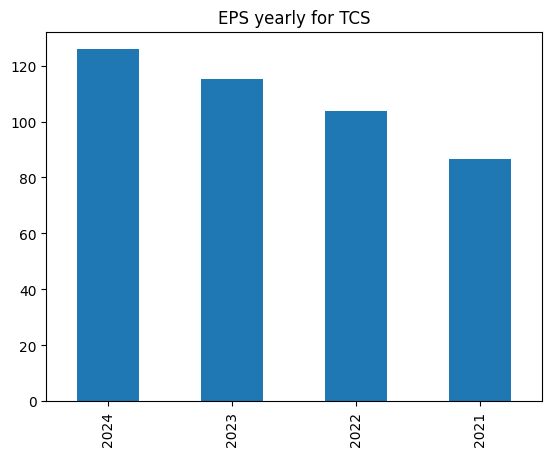

In [ ]:
EPS_year = df_fin_ratios['EPS'].index.year
df_fin_ratios['EPS'].plot.bar(title = 'EPS yearly for TCS')
plt.xticks(range(len(EPS_year)), EPS_year, rotation=90)
plt.show()

# 5.Daily OHCLV data for set of stocks

In [ ]:
INDIA_STOCKS = [
    'TCS.NS',
    'INFY.NS',
    'RELIANCE.NS',
    'HDFCBANK.NS',
    'BAJFINANCE.NS',
    'ICICIBANK.NS',
    'HINDUNILVR.NS',
    'KOTAKBANK.NS',
    'LT.NS',
    'SBI.NS'
]
US_STOCKS = ['MSFT', 'AAPL', 'GOOG', 'NVDA', 'AMZN', 'META', 'BRK-B', 'LLY', 'AVGO','V', 'JPM']
EU_STOCKS = ['NVO','MC.PA', 'ASML', 'RMS.PA', 'OR.PA', 'SAP', 'ACN', 'TTE', 'SIE.DE','IDEXY','CDI.PA']

In [ ]:
ALL_TICKERS = US_STOCKS  + EU_STOCKS + INDIA_STOCKS
ALL_TICKERS

['MSFT',
 'AAPL',
 'GOOG',
 'NVDA',
 'AMZN',
 'META',
 'BRK-B',
 'LLY',
 'AVGO',
 'V',
 'JPM',
 'NVO',
 'MC.PA',
 'ASML',
 'RMS.PA',
 'OR.PA',
 'SAP',
 'ACN',
 'TTE',
 'SIE.DE',
 'IDEXY',
 'CDI.PA',
 'TCS.NS',
 'INFY.NS',
 'RELIANCE.NS',
 'HDFCBANK.NS',
 'BAJFINANCE.NS',
 'ICICIBANK.NS',
 'HINDUNILVR.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'SBI.NS']

In [ ]:
import time
import yfinance as yf
import numpy as np

stocks_df = pd.DataFrame({'A':[]})

for i,ticker in enumerate(ALL_TICKERS):
  print(i,ticker)

  history_prices = yf.download(tickers = ticker,
                     period = "max",
                     interval = "1d")

  # features for historical prices
  history_prices['Ticker'] = ticker
  history_prices['Year'] = history_prices.index.year
  history_prices['Month'] = history_prices.index.month
  history_prices['Weekday'] = history_prices.index.weekday
  history_prices['Date'] = history_prices.index.date

  # historical returns
  for i in [1, 3, 7, 30, 90, 365]:
    history_prices['growth_'+str(i)+'d'] = history_prices['Close'] / history_prices['Close'].shift(i)
  history_prices['growth_future_5d'] = history_prices['Close'].shift(-5) / history_prices['Close']

  # simple moving average
  history_prices['SMA_10'] = history_prices['Close'].rolling(10).mean()
  history_prices['SMA_20'] = history_prices['Close'].rolling(20).mean()
  history_prices['growing_moving_average'] = np.where(history_prices['SMA_10'] > history_prices['SMA_20'], 1, 0)
  history_prices['high_minus_low_relative'] = (history_prices['High'] - history_prices['Low']) / history_prices['Close']

  # 30 day rolling volatility
  history_prices['volatility'] = history_prices['Close'].rolling(30).std()*np.sqrt(252)

  # what we want to predics
  history_prices['is_positive_growth_5d_future'] = np.where(history_prices['growth_future_5d'] > 1, 1, 0)

   # sleep 1 sec between downloads - not to overload the API server
  time.sleep(1)


  if stocks_df.empty:
    stocks_df = history_prices
  else:
    stocks_df = pd.concat([stocks_df, history_prices], ignore_index=True)



0 MSFT


[*********************100%***********************]  1 of 1 completed


1 AAPL


[*********************100%***********************]  1 of 1 completed


2 GOOG


[*********************100%***********************]  1 of 1 completed


3 NVDA


[*********************100%***********************]  1 of 1 completed


4 AMZN


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

5 META



[*********************100%***********************]  1 of 1 completed

6 BRK-B


7 LLY


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

8 AVGO


9 V


[*********************100%***********************]  1 of 1 completed


10 JPM


[*********************100%***********************]  1 of 1 completed


11 NVO


[*********************100%***********************]  1 of 1 completed


12 MC.PA


[*********************100%***********************]  1 of 1 completed


13 ASML


[*********************100%***********************]  1 of 1 completed


14 RMS.PA


[*********************100%***********************]  1 of 1 completed


15 OR.PA


[*********************100%***********************]  1 of 1 completed


16 SAP


[*********************100%***********************]  1 of 1 completed


17 ACN


[*********************100%***********************]  1 of 1 completed


18 TTE


[*********************100%***********************]  1 of 1 completed


19 SIE.DE


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

20 IDEXY


21 CDI.PA


[*********************100%***********************]  1 of 1 completed


22 TCS.NS


[*********************100%***********************]  1 of 1 completed


23 INFY.NS


[*********************100%***********************]  1 of 1 completed


24 RELIANCE.NS


[*********************100%***********************]  1 of 1 completed


25 HDFCBANK.NS


[*********************100%***********************]  1 of 1 completed


26 BAJFINANCE.NS


[*********************100%***********************]  1 of 1 completed


27 ICICIBANK.NS


[*********************100%***********************]  1 of 1 completed


28 HINDUNILVR.NS


[*********************100%***********************]  1 of 1 completed


29 KOTAKBANK.NS


[*********************100%***********************]  1 of 1 completed


30 LT.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SBI.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 1926-04-20 -> 2025-03-26)')


31 SBI.NS


In [ ]:
def get_ticker_type(ticker:str, us_stocks_list, eu_stocks_list, india_stocks_list):
  if ticker in us_stocks_list:
    return 'US'
  elif ticker in eu_stocks_list:
    return 'EU'
  elif ticker in india_stocks_list:
    return 'INDIA'
  else:
    return 'ERROR'

In [ ]:
stocks_df

Price,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,Date,...,High,Low,Open,Volume,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,,,,,,...,LT.NS,LT.NS,LT.NS,LT.NS,SBI.NS,SBI.NS,SBI.NS,SBI.NS,SBI.NS,SBI.NS
0,0.059707,0.062373,0.054376,0.054376,1.031789e+09,MSFT,1986,3,3,1986-03-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.061839,0.062906,0.059707,0.059707,3.081600e+08,MSFT,1986,3,4,1986-03-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.062906,0.063439,0.061839,0.061839,1.331712e+08,MSFT,1986,3,0,1986-03-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.061306,0.063439,0.060773,0.062906,6.776640e+07,MSFT,1986,3,1,1986-03-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.060240,0.061839,0.059707,0.061306,4.789440e+07,MSFT,1986,3,2,1986-03-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220523,NaN,NaN,NaN,NaN,NaN,LT.NS,2025,3,3,2025-03-20,...,3358.899902,3276.899902,3335.25,2434722.0,NaN,NaN,NaN,NaN,NaN,NaN
220524,NaN,NaN,NaN,NaN,NaN,LT.NS,2025,3,4,2025-03-21,...,3455.000000,3332.750000,3357.00,3042073.0,NaN,NaN,NaN,NaN,NaN,NaN
220525,NaN,NaN,NaN,NaN,NaN,LT.NS,2025,3,0,2025-03-24,...,3517.000000,3446.000000,3449.00,1955564.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
stocks_df['ticker_type'] = stocks_df.Ticker.apply(lambda x:get_ticker_type(x, US_STOCKS, EU_STOCKS, INDIA_STOCKS))

In [ ]:
stocks_df['ticker_type'].value_counts()

,count
ticker_type,
US,83157
EU,79532
INDIA,57839


In [ ]:
stocks_df.Ticker.nunique()


31

In [ ]:
stocks_df.Ticker.value_counts()


,count
Ticker,
LLY,13316
JPM,11349
AAPL,11162
NVO,11067
MSFT,9835
CDI.PA,8556
TTE,8414
ASML,7559
SAP,7430


In [ ]:
stocks_df.groupby(['Ticker','ticker_type']).Date.agg(['min','max'])

,,min,max
Ticker,ticker_type,,
AAPL,US,1980-12-12,2025-03-26
ACN,EU,2001-07-19,2025-03-26
AMZN,US,1997-05-15,2025-03-26
ASML,EU,1995-03-15,2025-03-26
AVGO,US,2009-08-06,2025-03-26
BAJFINANCE.NS,INDIA,2002-07-01,2025-03-26
BRK-B,US,1996-05-09,2025-03-26
CDI.PA,EU,1992-01-27,2025-03-26
GOOG,US,2004-08-19,2025-03-26


In [ ]:
#  average growth 365days
stocks_df[stocks_df.Year>=2020].groupby(by=['Year','ticker_type']).growth_365d.mean()

Year  ticker_type
2020  EU             1.245388
      INDIA          1.175248
      US             1.484070
2021  EU             1.582170
      INDIA          1.605975
      US             1.797571
2022  EU             1.191169
      INDIA          1.322284
      US             1.182379
2023  EU             1.247590
      INDIA          1.104235
      US             1.203253
2024  EU             1.407654
      INDIA          1.217444
      US             2.159361
2025  EU             1.226197
      INDIA          1.136979
      US             1.753219
Name: growth_365d, dtype: float64

In [ ]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])


In [ ]:
stocks_df[stocks_df.Date>='2000-01-01'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 182267 entries, 3490 to 220527
Columns: 180 entries, ('Close', 'MSFT') to ('ticker_type', '')
dtypes: datetime64[ns](1), float64(172), int32(3), int64(2), object(2)
memory usage: 249.6+ MB


In [ ]:
stocks_df[stocks_df.Date=='2024-04-01'].head()

Price,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,Date,...,Low,Open,Volume,Adj Close,Close,High,Low,Open,Volume,ticker_type
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,,,,,,...,LT.NS,LT.NS,LT.NS,SBI.NS,SBI.NS,SBI.NS,SBI.NS,SBI.NS,SBI.NS,
9588,421.353119,424.647971,419.020918,420.737821,16316000.0,MSFT,2024,4,0,2024-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US
20749,NaN,NaN,NaN,NaN,NaN,AAPL,2024,4,0,2024-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US
25933,NaN,NaN,NaN,NaN,NaN,GOOG,2024,4,0,2024-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US
32518,NaN,NaN,NaN,NaN,NaN,NVDA,2024,4,0,2024-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US
39528,NaN,NaN,NaN,NaN,NaN,AMZN,2024,4,0,2024-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US


In [ ]:
stocks_df['Volume'] = stocks_df['Volume']*1.0

In [ ]:
for f in ['Open','High','Low','Close', 'Volume']:
  stocks_df.loc[:,f] = stocks_df.loc[:,f].astype('float64')


In [ ]:
stocks_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220528 entries, 0 to 220527
Columns: 180 entries, ('Close', 'MSFT') to ('ticker_type', '')
dtypes: datetime64[ns](1), float64(172), int32(3), int64(2), object(2)
memory usage: 300.3+ MB


In [ ]:
stocks_df[stocks_df.Date=='2024-04-01'].tail()

Price,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,Date,...,Low,Open,Volume,Adj Close,Close,High,Low,Open,Volume,ticker_type
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,,,,,,...,LT.NS,LT.NS,LT.NS,SBI.NS,SBI.NS,SBI.NS,SBI.NS,SBI.NS,SBI.NS,
195735,NaN,NaN,NaN,NaN,NaN,BAJFINANCE.NS,2024,4,0,2024-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INDIA
201381,NaN,NaN,NaN,NaN,NaN,ICICIBANK.NS,2024,4,0,2024-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INDIA
208725,NaN,NaN,NaN,NaN,NaN,HINDUNILVR.NS,2024,4,0,2024-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INDIA
214633,NaN,NaN,NaN,NaN,NaN,KOTAKBANK.NS,2024,4,0,2024-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INDIA
220282,NaN,NaN,NaN,NaN,NaN,LT.NS,2024,4,0,2024-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INDIA
